In [14]:
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import shapiro, kstest, norm, probplot
import seaborn as sns

In [15]:
file_path = Path('Resources/Heart_Disease.csv')
df = pd.read_csv(file_path)
df.head()

,sex,age,education,smokingStatus,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CHDRisk
0,male,39,4,no,0,0,0,0,no,195,106.0,70.0,26.97,80,77,no
1,female,46,2,no,0,0,0,0,no,250,121.0,81.0,28.73,95,76,no
2,male,48,1,yes,20,0,0,0,no,245,127.5,80.0,25.34,75,70,no
3,female,61,3,yes,30,0,0,1,no,225,150.0,95.0,28.58,65,103,yes
4,female,46,3,yes,23,0,0,0,no,285,130.0,84.0,23.10,85,85,no


In [16]:
# Mapping yes/no columns to binary numeric
df['CHDRisk'] = df['CHDRisk'].map({'yes': 1, 'no': 0})
df['diabetes'] = df['diabetes'].map({'yes': 1, 'no': 0})
df['smokingStatus'] = df['smokingStatus'].map({'yes': 1, 'no': 0})

df.head()

,sex,age,education,smokingStatus,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CHDRisk
0,male,39,4,0.0,0,0,0,0,0,195,106.0,70.0,26.97,80,77,0
1,female,46,2,0.0,0,0,0,0,0,250,121.0,81.0,28.73,95,76,0
2,male,48,1,1.0,20,0,0,0,0,245,127.5,80.0,25.34,75,70,0
3,female,61,3,1.0,30,0,0,1,0,225,150.0,95.0,28.58,65,103,1
4,female,46,3,1.0,23,0,0,0,0,285,130.0,84.0,23.10,85,85,0


In [17]:
# Checking nulls
null_values = df.isnull().sum()
null_values

sex                11
age                 0
education           0
smokingStatus      13
cigsPerDay          0
BPMeds              0
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol             0
sysBP               0
diaBP               0
BMI                 0
heartRate           0
glucose             0
CHDRisk             0
dtype: int64

In [20]:
print(f'The number of rows before dropping null values is {df.shape[0]}')

The number of rows before dropping null values is 3674


In [21]:
df_cleaned = df.dropna()

In [23]:
print(f'The number of rows after dropping null values is {df_cleaned.shape[0]}')

The number of rows after dropping null values is 3652


## Checking if target variable is normally distributed

c:\Users\emily\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


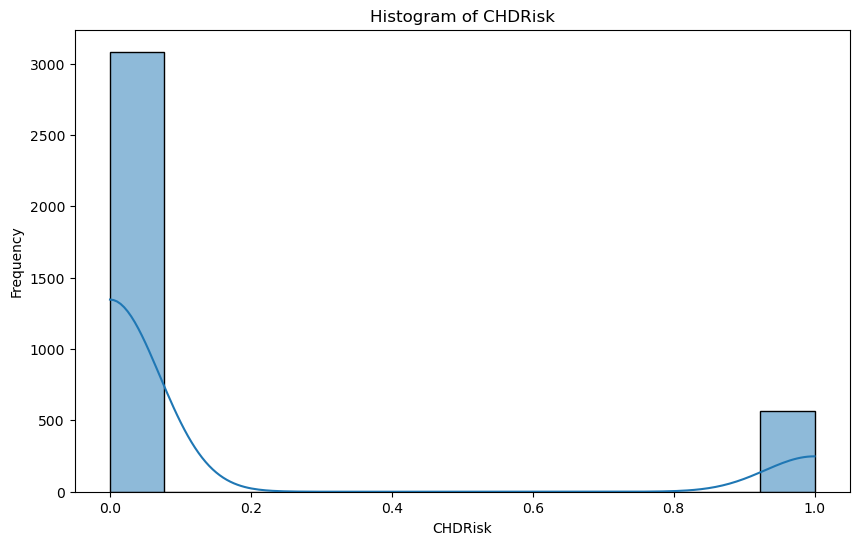

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['CHDRisk'], kde=True)
plt.xlabel('CHDRisk')
plt.ylabel('Frequency')
plt.title('Histogram of CHDRisk')
plt.show()

In [25]:
stat, p = shapiro(df_cleaned['CHDRisk'])
print('Shapiro-Wilk Test: Statistics=%.3f, p=%.3f' % (stat, p))

Shapiro-Wilk Test: Statistics=0.434, p=0.000


Interpreting the Shapiro-Wilk test: a test statistic of 0.43 indicates the target variable is not normally distributed.

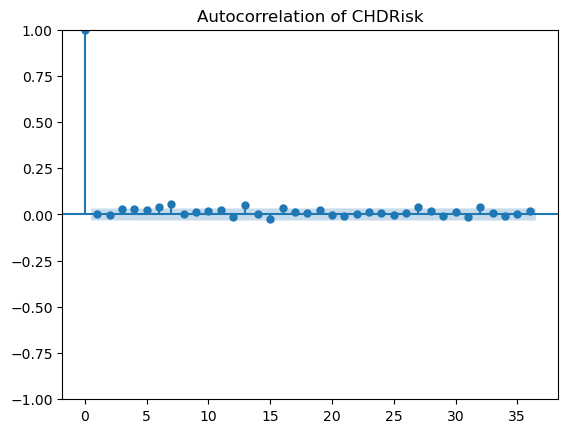

In [29]:
from statsmodels.graphics.tsaplots import plot_acf

# Plot autocorrelation function
plot_acf(df_cleaned['CHDRisk'])
plt.title('Autocorrelation of CHDRisk')
plt.show()


In [31]:
from scipy.stats import ks_2samp

# Split data into two halves
first_half = df_cleaned['CHDRisk'].iloc[:len(df)//2]
second_half = df_cleaned['CHDRisk'].iloc[len(df)//2:]

# Perform Kolmogorov-Smirnov test
stat, p_value = ks_2samp(first_half, second_half)
print('Kolmogorov-Smirnov Test: Statistics=%.3f, p=%.3f' % (stat, p_value))

# Interpretation
if p_value > 0.05:
    print("The two halves of the data come from the same distribution (fail to reject H0)")
else:
    print("The two halves of the data do not come from the same distribution (reject H0)")


Kolmogorov-Smirnov Test: Statistics=0.006, p=1.000
The two halves of the data come from the same distribution (fail to reject H0)
